In [1]:
import sys
import json

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from circlepack import C
from wordcloud import WordCloud  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vigne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
fullText = open("taxico_review.txt", "r",encoding='utf-16')
#print(fullText.read(1000))

tokenizer = RegexpTokenizer(r'\w+')
#words =nltk.word_tokenize(fullText.read())
words = tokenizer.tokenize(fullText.read())
fullText.close()

allwords = ' '.join(words)
tokenizer = MWETokenizer()
tokenizer.add_mwe(('need', 'more', 'mini'))
words = tokenizer.tokenize(allwords.split())

In [3]:
words = [word.lower() for word in words]
words = [word for word in words if len(word) > 2]
words = [word for word in words if not word.isnumeric()]

In [4]:
nltkStopwords = set(nltk.corpus.stopwords.words('english'))
myStopwords = set(("may","much","many","would","could","will","ha","wa","get","tri","use","back","take"))
stopwords = nltkStopwords | myStopwords
words = [word for word in words if word not in stopwords]

In [5]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]

In [6]:
allwords = ' '.join(words)
wordcloud = WordCloud(max_font_size=50, max_words=150, background_color="white").generate(allwords)

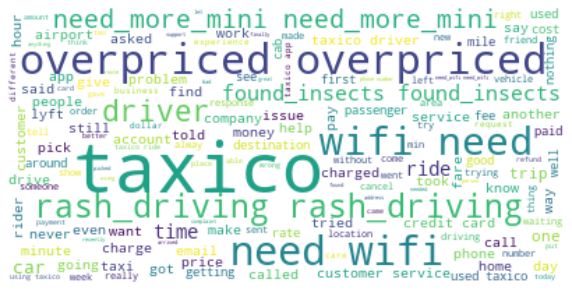

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
wordcloud.to_file("word-clutter.png")

In [8]:
words = [word for word in words if len(word) > 4]
frequency = nltk.FreqDist(words)
keywords = frequency.most_common(20)
keywords = pd.DataFrame(keywords, columns = ['word', 'freq'])
keywords["radius"] =round((np.sqrt(keywords.freq) * 10)/2)

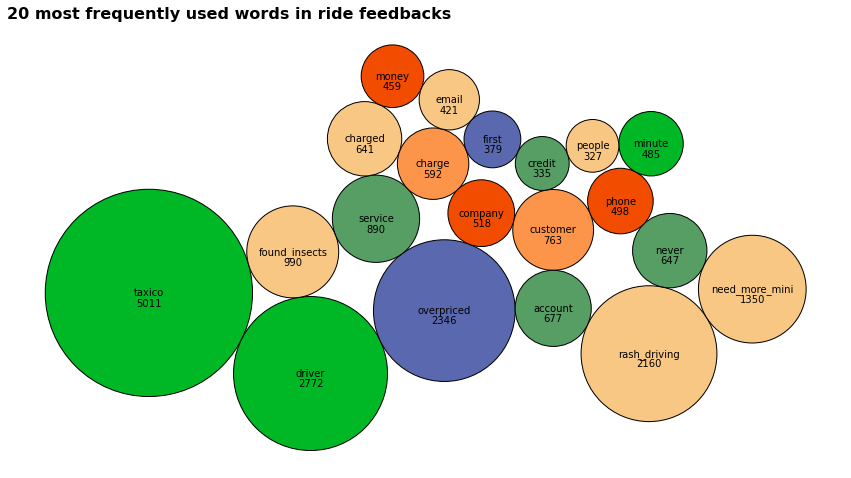

In [9]:
colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825']
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(15, 15))
ax.axis("off")
c = C(keywords.radius)
c.minimize()
c.plot(ax, keywords.word, keywords.freq, colors)
plt.title("20 most frequently used words in ride feedbacks", loc='left', fontsize=16,fontweight='bold', color='black')
ax.relim()
ax.autoscale_view()
plt.show()
#fig.savefig('word-bubbles.pdf', bbox_inches='tight', format='pdf')
fig.savefig('word-bubbles.png', bbox_inches='tight', dpi=250)